<a href="https://colab.research.google.com/github/VBsaini/deepLearning-ZTM/blob/main/01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regresion with Neural Network in TensorFlow

There are many definitions for a regression problems but in our case , we're going to simplify it: prediction a numerical variable based on some other combination of variable, even shorter... predicting a number

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## Creating data to review and fit

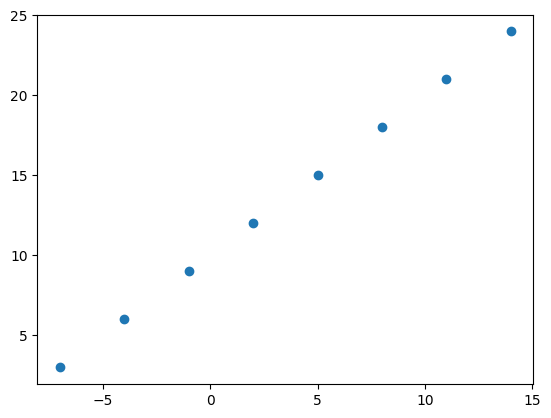

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)
plt.show()

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Inputs and outputs

In [ ]:
# Create a demo for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
# Turn our numpy array to tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns b/w X & y (features and labels).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae short for mean absolute error
              optimizer = tf.keras.optimizers.SGD(), # sgd is short for stochasitc gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 19.5520 - mae: 19.5520
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 19.2708 - mae: 19.2708
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 18.9895 - mae: 18.9895
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 18.7083 - mae: 18.7083
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 18.4270 - mae: 18.4270


In [ ]:
# Try and make a prediction using our model
input_data = np.array([[17.0]])
y_pred = model.predict(input_data)
# y_pred


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


## Improvine our model

we can imporve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called nuerons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# Create the model (add more layers)
model = tf.keras.Sequential(
    [
      tf.keras.layers.Dense(100, activation="relu"),
     tf.keras.layers.Dense(1)]
)

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 13.9065 - mae: 13.9065
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 13.2996 - mae: 13.2996
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 12.6944 - mae: 12.6944
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.0852 - mae: 12.0852
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 11.4757 - mae: 11.4757
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 10.8741 - mae: 10.8741
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 10.2534 - mae: 10.2534
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 9.6217 - mae: 9.6217
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 8.9641 - mae: 8.9641
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 8.2678 - mae: 8.2678
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 7.5371 - mae: 7.5371
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.7559 - mae: 6.7559
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
data = np.array([[17.0]])
# y_pred = model.predict(data)
# y_pred

# overfitting - learing too well from the pattern

In [ ]:
# Let's rebuild our model again to see if predictions has improved


# Create the model (add more layers)
model = tf.keras.Sequential(
    [
    tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.Dense(1)]
)

# Compile the model (learning_rate is the most imp hyperparameter)
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics=["mae"]
)

# Fit the model (this time we will train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.8104 - mae: 12.8104
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step - loss: 12.1228 - mae: 12.1228
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.4246 - mae: 11.4246
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.7132 - mae: 10.7132
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.9866 - mae: 9.9866
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 9.2423 - mae: 9.2423
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.4781 - mae: 8.4781
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.6919 - mae: 7.6919
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.8818 - mae: 6.8818
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.7738 - mae: 6.7738
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.1146 - mae: 7.1146
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.3314 - mae: 7.3314
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

In [ ]:
data = np.array([[20.0]])
y_pred = model.predict(data)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step


array([[29.344797]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it
-> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation... there are 3 words you should memorize:
>"Visualize, visualize, visaulize"

It's a good idea to visualize:
* The data - what data are we working with? what does is look like?
* The model iself - what does our model look like?
* The training of a model - how does a model perform while it leanrns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)

In [ ]:
 # Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

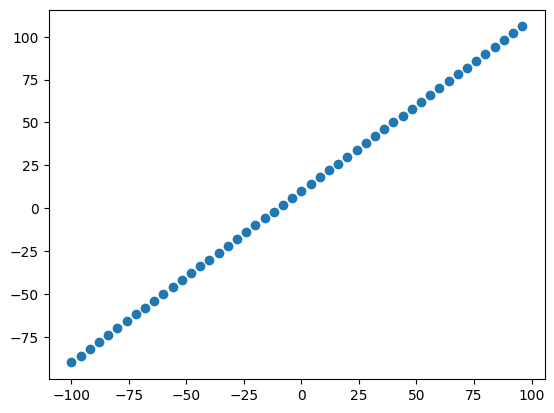

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets...
* **Training set** - 70-80%
* **Validation set** - model gets tuned on this data, 10 - 15%
* **Testing set** - 10 - 15%

In [ ]:
len(X)

50

In [ ]:
X_train = X[:40] # first 40 samples (80% of data)
y_train = y[:40] # first 40 samples (80% of data)

X_test = X[40:] # last 10 samples (20% of data)
y_test = y[40:] # last 10 samples (20% of data)

len(X_train), len(X_test)

(40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

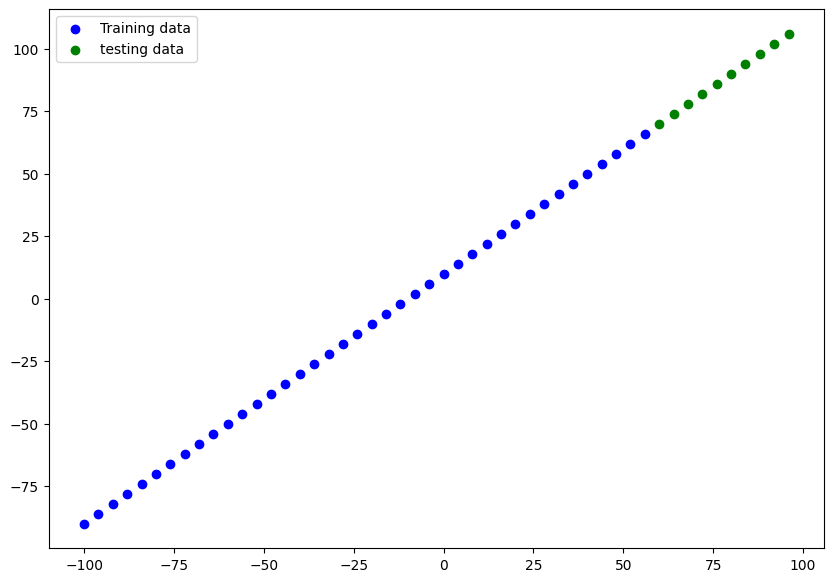

In [ ]:
plt.figure(figsize=(10, 7))
# Plot trainig data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="green", label="testing data")
# Show a legend
plt.legend();

In [ ]:
# let's build a model

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# compile a model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
    )

# fit a model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 445ms/step - loss: 32.0717 - mae: 32.0717
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31.9874 - mae: 31.9874
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 31.9032 - mae: 31.9032 
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 31.8190 - mae: 31.8190
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 31.7348 - mae: 31.7348


### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8 (36.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6 (28.00 B)

In [ ]:
# Let's create a model which builds automatically by defining the inpu_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# Compile the model
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=["mae", "mse"]
    )

# fit a model
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 905 (3.54 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 604 (2.36 KB)

* Total params - total numer of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-Trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from the models during **Transfer Learning**).

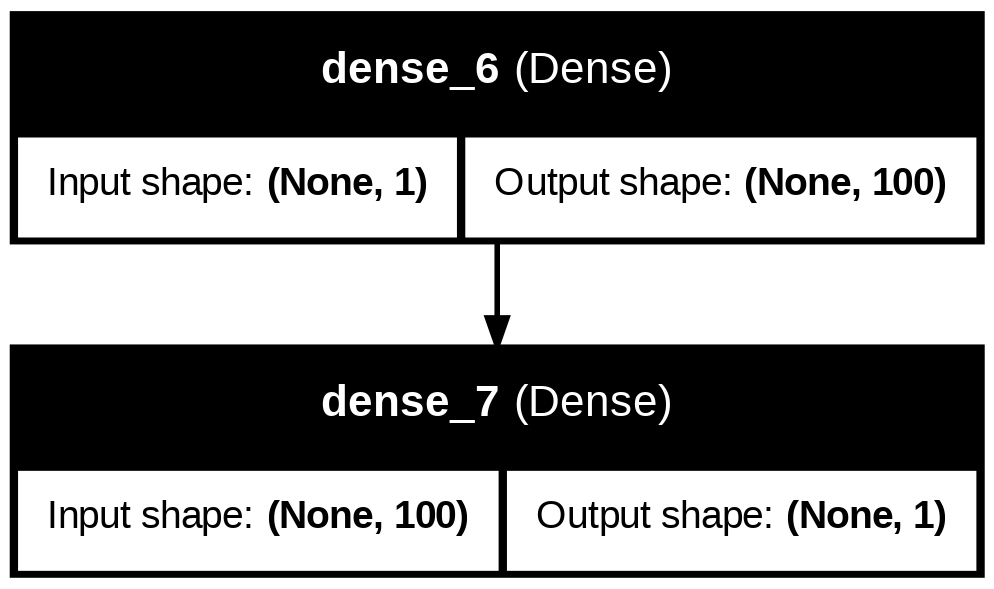

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_layer_names=True, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions - good idea to plot them against the grnd truth

In [ ]:
# Make some predictions
y_preds = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


In [ ]:
y_preds

array([[ 70.73815 ],
       [ 74.78603 ],
       [ 78.83393 ],
       [ 82.88181 ],
       [ 86.92971 ],
       [ 90.97761 ],
       [ 95.0255  ],
       [ 99.07339 ],
       [103.121284],
       [107.16918 ]], dtype=float32)

In [ ]:
# plotting fucntion
def plot_pred(train_data=X_train,
              train_labels=y_train,
              test_data=X_test,
              test_labels=y_test,
              pred = y_preds):
  """
  plots the data and compare predictions to grnd truth labels.
  """
  plt.figure(figsize=(10, 7))
  # train data in blue
  plt.scatter(train_data, train_labels, c="b",label="Training Data")

  # test data in blue
  plt.scatter(test_data, test_labels, c="g",label="Testing Data")

  # pred data in red
  plt.scatter(test_data, pred, c="r", label="predictions")

  # Show the legend
  plt.legend()

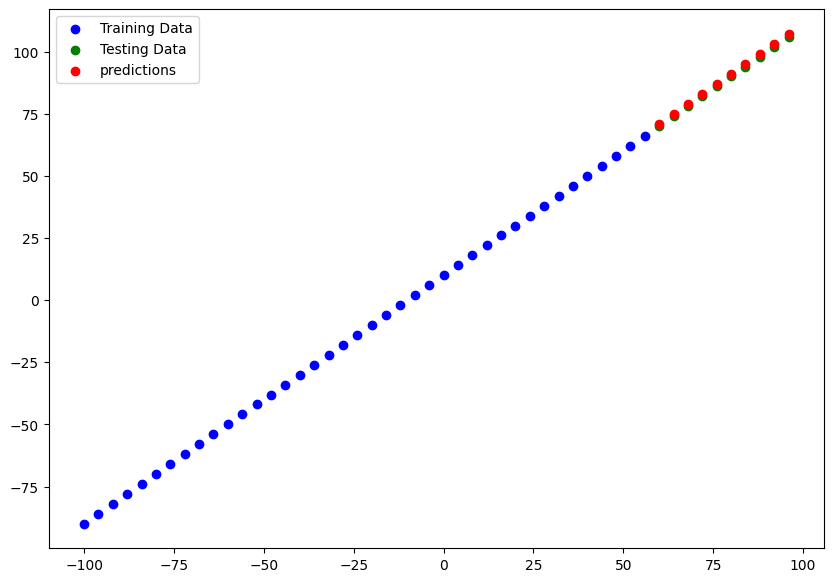

In [ ]:
plot_pred()

### Evaluation of models preds with regression evaluation metrics

In [ ]:
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step - loss: 0.9537 - mae: 0.9537 - mse: 0.9284


[0.9536598324775696, 0.9536598324775696, 0.9283899068832397]

In [ ]:
# calculate MAE
# y test has shape (10,) while y_preds has shape (10, 1) soo make it same
tf.keras.losses.mae(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=0.95365983>

In [ ]:
# calculate MSE
tf.keras.losses.mse(y_test, tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=0.92839>

In [ ]:
def mae(y_test, y_preds):
  return tf.keras.losses.mae(y_test, y_preds)
def mse(y_test, y_preds):
  return tf.keras.losses.mse(y_test, y_preds)

## Running experiments to improve our model  

In [ ]:
# set random seed
tf.random.set_seed(42)

# create
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"] )

# fit the mode
model_1.fit(X_train, y_train, epochs=100, verbose=0)


In [ ]:
 # make amd plot and prediction for model_1
y_preds_1 = model_1.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


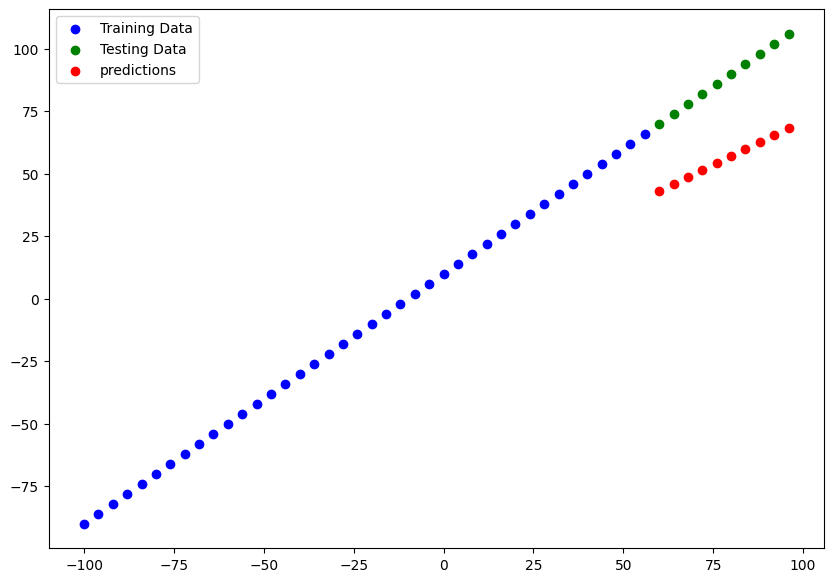

In [ ]:
plot_pred(X_train, y_train, X_test, y_test, y_preds_1)

In [ ]:
mae_1 = mae(y_test, tf.squeeze(y_preds_1))
mse_1 = mse(y_test, tf.squeeze(y_preds_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=32.242107>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1051.6627>)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"] )

# fit the mode
model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
 # make amd plot and prediction for model_1
y_preds_2 = model_2.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step


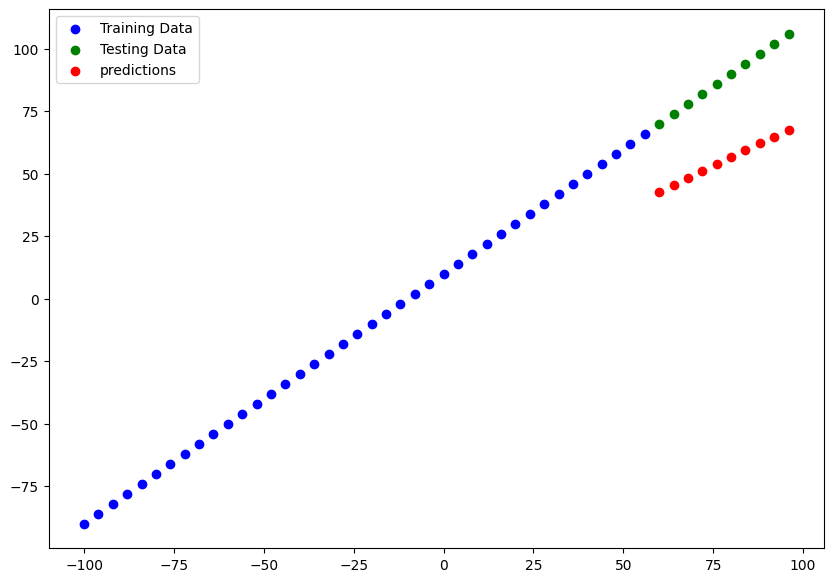

In [ ]:
plot_pred(X_train, y_train, X_test, y_test, y_preds_2)

In [ ]:
mae_2 = mae(y_test, tf.squeeze(y_preds_2))
mse_2 = mse(y_test, tf.squeeze(y_preds_2))
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=32.73178>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1084.2677>)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=[1]),
    tf.keras.layers.Dense(1, input_shape=[1])
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"] )

# fit the mode
model_3.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
 # make amd plot and prediction for model_1
y_preds_3 = model_3.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


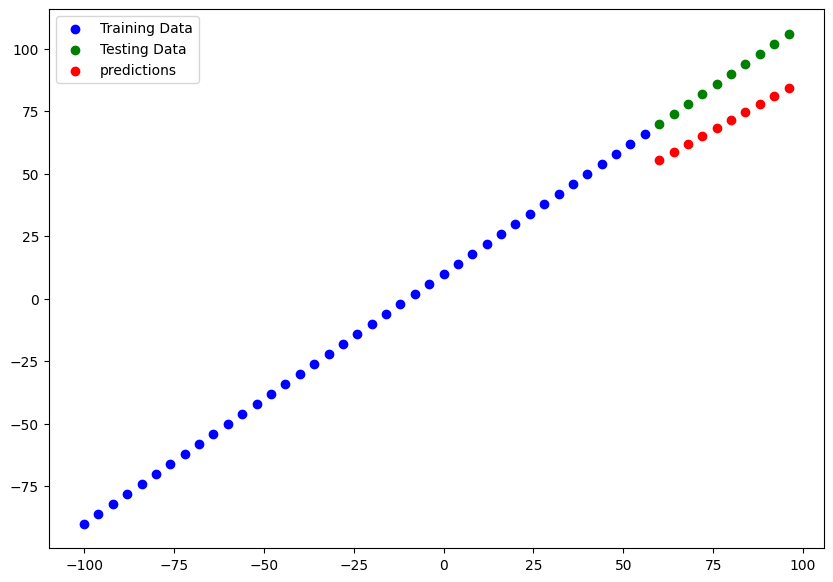

In [ ]:
plot_pred(X_train, y_train, X_test, y_test, y_preds_3)

In [ ]:
mae_3 = mae(y_test, tf.squeeze(y_preds_3))
mse_3 = mse(y_test, tf.squeeze(y_preds_3))
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=18.071293>,
 <tf.Tensor: shape=(), dtype=float32, numpy=331.35233>)

## Comparing th results of our experiments

In [ ]:
import pandas as pd

model_results = [["Model_1",  mae_1.numpy(), mse_1.numpy()],
                 ["Model_2",  mae_2.numpy(), mse_2.numpy()],
                 ["Model_3",  mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
all_results

,Model,MAE,MSE
0,Model_1,32.242107,1051.662720
1,Model_2,32.731781,1084.267700
2,Model_3,18.071293,331.352325


## Saving our models

3 ways to save model
1. The SavedModel format (not useable now)
2. The HDF5 format (considered legacy)
3. Keras format (best way to do it acc to tensorflow doc)

In [ ]:
# save model using the SavedModel format}
model_1.export("best_model_savedmodel_format")

Saved artifact at 'best_model_savedmodel_format'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1), dtype=tf.float32, name='keras_tensor_13')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140618470627232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140618470621600: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
# save model using the HDF5 format
model_1.save("best_model_h5_format.h5")

In [ ]:
# save model using the Keras format
model_1.save("best_model_h5_format.keras")

## Loading in a saved model

In [ ]:
load_model = tf.keras.models.load_model("best_model_h5_format.h5")
y_preds = load_model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


array([[43.209724],
       [45.998207],
       [48.78669 ],
       [51.575172],
       [54.36365 ],
       [57.152134],
       [59.940617],
       [62.729095],
       [65.51758 ],
       [68.30606 ]], dtype=float32)

In [ ]:
y_preds == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
load_model = tf.keras.models.load_model("best_model_h5_format.keras")
y_preds = load_model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 4 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


array([[43.209724],
       [45.998207],
       [48.78669 ],
       [51.575172],
       [54.36365 ],
       [57.152134],
       [59.940617],
       [62.729095],
       [65.51758 ],
       [68.30606 ]], dtype=float32)

In [ ]:
y_preds == y_preds_1

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download files from google colab
 ofc one way from the file section

In [ ]:
from google.colab import files
# files.download("/content/best_model_h5_format.keras")

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import math
import matplotlib.pyplot as plt

# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Need to conver the data (object types) to numbers
# Hence one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
# Create X and y values
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train = X[:math.floor((len(X)*80)/100)]
# y_train = y[:math.floor((len(X)*80)/100)]
# X_test = X[math.floor((len(X)*80)/100):]
# y_test = y[math.floor((len(X)*80)/100):]
len(X_train), len(X_test)

(1070, 268)

In [ ]:
X_train.head(), y_train.head()

(      age    bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 560    46  19.95         2        True     False       True       False   
 1285   47  24.32         0        True     False       True       False   
 1142   52  24.86         0        True     False       True       False   
 969    39  34.32         5        True     False       True       False   
 486    54  21.47         3        True     False       True       False   
 
       region_northeast  region_northwest  region_southeast  region_southwest  
 560              False              True             False             False  
 1285              True             False             False             False  
 1142             False             False              True             False  
 969              False             False              True             False  
 486              False              True             False             False  ,
 560      9193.83850
 1285     8534.67180
 1142    27117.9937

In [ ]:
tf.random.set_seed(42)

# Create
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# Fit
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 10025.5430 - mae: 10025.5430
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7782.1479 - mae: 7782.1479
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7473.7886 - mae: 7473.7886
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7706.7119 - mae: 7706.7119
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7522.7900 - mae: 7522.7900
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7533.7378 - mae: 7533.7378
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7644.7373 - mae: 7644.7373
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7666.1138 - mae: 7666.1138
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7428.7456 - mae: 7428.7456
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7656.6802 - mae: 7656.6802
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7495.3149 - mae: 7495.3149
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/st

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 7972.1050 - mae: 7972.1050


[7934.04296875, 7934.04296875]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

RN our model is bad soo we need to improve it

In [ ]:
tf.random.set_seed(42)

# Create
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit
insurance_model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 13290.6572 - mae: 13290.6572
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 13164.1123 - mae: 13164.1123
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12908.5088 - mae: 12908.5088
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12373.3525 - mae: 12373.3525
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11398.7529 - mae: 11398.7529
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9992.7451 - mae: 9992.7451  
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8521.1045 - mae: 8521.1045
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7593.4663 - mae: 7593.4663
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7402.1572 - mae: 7402.1572 
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7370.4746 - mae: 7370.4746 
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7349.2354 - mae: 7349.2354
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 5035.4023 - mae: 5035.4023


[4887.4814453125, 4887.4814453125]

In [ ]:
# 3rd model more epochs
tf.random.set_seed(42)

# Create
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=0)

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3472.7229 - mae: 3472.7229


[3407.485107421875, 3407.485107421875]

In [ ]:
# 3rd model more epochs
tf.random.set_seed(42)

# Create
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
insurance_model_4.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Fit
history = insurance_model_4.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
insurance_model_4.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 3208.9395 - mae: 3208.9395


[3162.00341796875, 3162.00341796875]

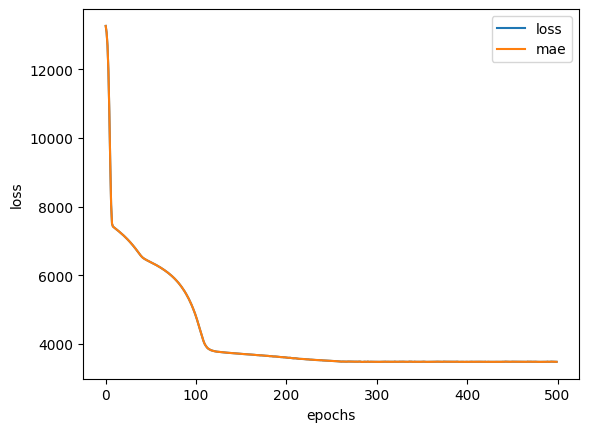

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()

🥸EarlyStopping Callback -> tensorflow func to know how long to train a model for